In [2]:
!pip install numpy==1.24.0
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot

In [4]:
!pip install arch
from arch.unitroot import ADF,KPSS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.1 MB/s eta 0:00:00


In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import  Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [6]:
veri = pd.read_excel("/content/EVDS (10) (1).xlsx")
print(veri)

       Tarih         SUE
0    2005-01   44.263263
1    2005-02   42.455703
2    2005-03   41.949038
3    2005-04   42.409551
4    2005-05   42.807578
..       ...         ...
224  2023-09  107.388824
225  2023-10  106.681751
226  2023-11  104.899626
227  2023-12  107.218098
228  2024-01  107.749883

[229 rows x 2 columns]


In [7]:
tarih = pd.date_range("01.01.2005",periods=len(veri["Tarih"]),freq="M")
veri["Tarih"] = tarih
veri.set_index("Tarih",inplace=True)
print(veri)

                   SUE
Tarih                 
2005-01-31   44.263263
2005-02-28   42.455703
2005-03-31   41.949038
2005-04-30   42.409551
2005-05-31   42.807578
...                ...
2023-09-30  107.388824
2023-10-31  106.681751
2023-11-30  104.899626
2023-12-31  107.218098
2024-01-31  107.749883

[229 rows x 1 columns]


/tmp/ipython-input-7-1922533220.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tarih = pd.date_range("01.01.2005",periods=len(veri["Tarih"]),freq="M")


In [8]:
print(veri.isnull().sum())

SUE    0
dtype: int64


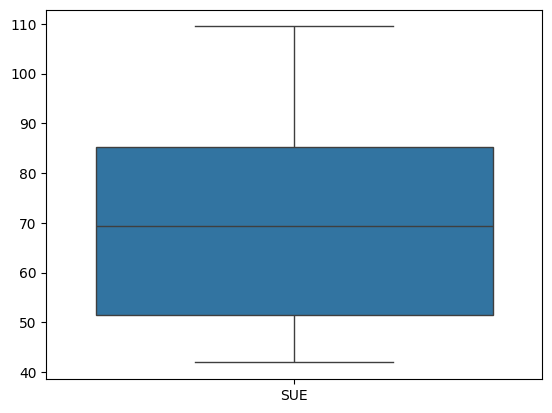

In [9]:
sns.boxplot(veri)
plt.show()

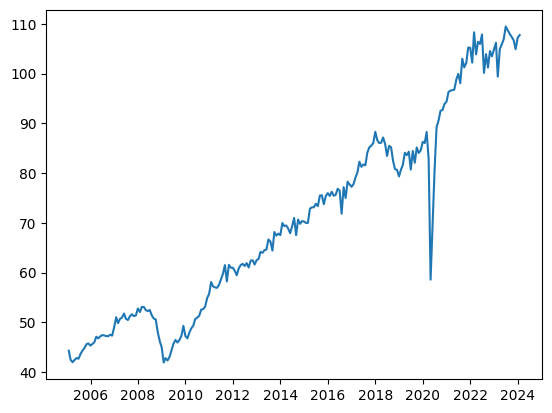

In [10]:
plt.plot(veri)
plt.show()

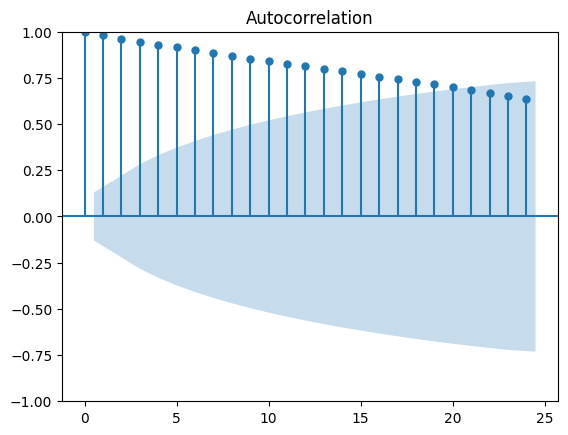

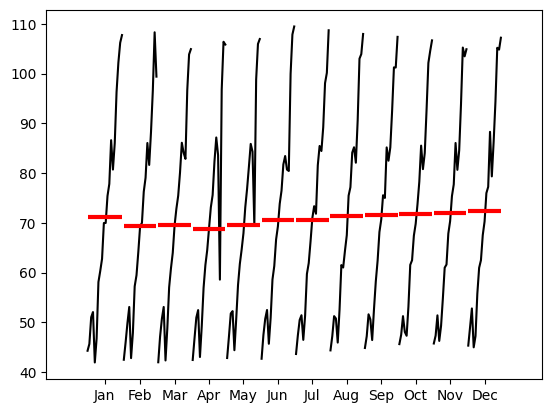

In [11]:
plot_acf(veri)
month_plot(veri)
plt.show()

In [12]:
verion = veri.iloc[:-24]
verison = veri.iloc[-24:]
print(verison)

                   SUE
Tarih                 
2022-02-28  108.309495
2022-03-31  103.858443
2022-04-30  106.400934
2022-05-31  105.965459
2022-06-30  107.868514
2022-07-31  100.151273
2022-08-31  103.927845
2022-09-30  101.223436
2022-10-31  104.548371
2022-11-30  103.475510
2022-12-31  104.829132
2023-01-31  106.205609
2023-02-28   99.392340
2023-03-31  104.924413
2023-04-30  105.843824
2023-05-31  106.953950
2023-06-30  109.477859
2023-07-31  108.711258
2023-08-31  107.971509
2023-09-30  107.388824
2023-10-31  106.681751
2023-11-30  104.899626
2023-12-31  107.218098
2024-01-31  107.749883


In [13]:
adf = ADF(verion)
kpss = KPSS(verion)
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                  0.075
P-value                         0.964
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  2.082
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [14]:
veri_fark = veri.diff().dropna()
adf2 = ADF(veri_fark)
kpss2 = KPSS(veri_fark)
print(adf2)
print(kpss2)

   Augmented Dickey-Fuller Results   
Test Statistic                -11.381
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.103
P-value                         0.573
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [18]:
model = auto_arima(verion,trace=False,seasonal=False)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -476.727
Date:                Wed, 02 Jul 2025   AIC                            963.454
Time:                        11:03:27   BIC                            980.045
Sample:                    01-31-2005   HQIC                           970.165
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1531      0.095      1.611      0.107      -0.033       0.339
ar.L1          0.6213      0.119      5.216      0.000       0.388       0.855
ar.L2         -0.1453      0.045     -3.231      0.0

In [19]:
for i in range(2,13):
  smodel = auto_arima(verion,trace=False,seasonal=True,m=i)
  print("m= {} için AIC {}".format(i,smodel.aic()))

m= 2 için AIC 966.0918095723464
m= 3 için AIC 963.4541383388585
m= 4 için AIC 963.4541383388585
m= 5 için AIC 963.4541383388585
m= 6 için AIC 963.4541383388585
m= 7 için AIC 963.4541383388585
m= 8 için AIC 963.4541383388585
m= 9 için AIC 963.4541383388585
m= 10 için AIC 963.4541383388585
m= 11 için AIC 963.4541383388585
m= 12 için AIC 963.4541383388585


In [20]:
model1 = auto_arima(verion,trace=False,seasonal=True,m=4)
model2 = auto_arima(verion,trace=False,seasonal=True,m=12)
print(model1.summary())
print(model2.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -476.727
Date:                Wed, 02 Jul 2025   AIC                            963.454
Time:                        11:06:44   BIC                            980.045
Sample:                    01-31-2005   HQIC                           970.165
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1531      0.095      1.611      0.107      -0.033       0.339
ar.L1          0.6213      0.119      5.216      0.000       0.388       0.855
ar.L2         -0.1453      0.045     -3.231      0.0

In [21]:
q = acorr_ljungbox(model1.resid())
print(q)

     lb_stat  lb_pvalue
1   0.200415   0.654386
2   0.201342   0.904230
3   0.316447   0.956906
4   0.317703   0.988643
5   0.356049   0.996454
6   0.577473   0.996764
7   0.672408   0.998539
8   0.888929   0.998857
9   0.948844   0.999547
10  1.101633   0.999732


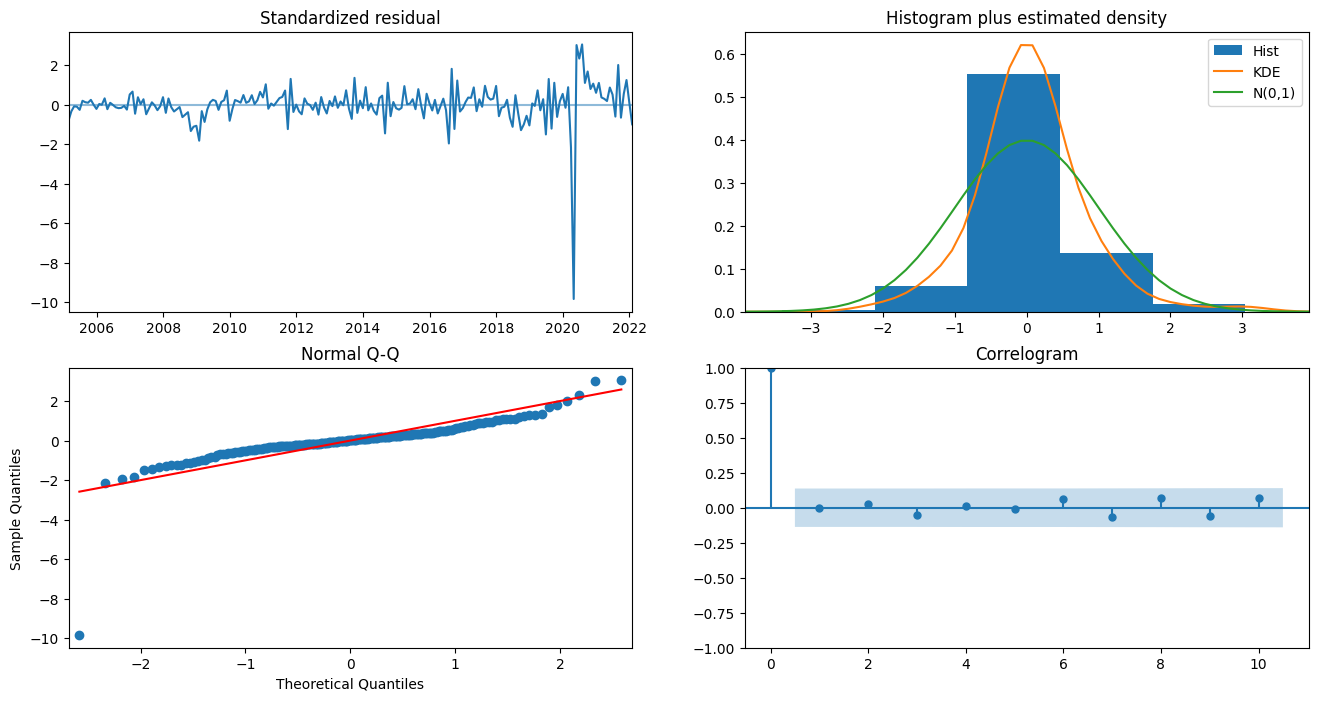

In [24]:
from statsmodels.tsa.arima_model import ARIMAResults
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [25]:
tahming = model.fittedvalues()
tahmin = model.predict(24)
print(tahming)

Tarih
2005-01-31      0.292256
2005-02-28     44.555506
2005-03-31     42.837592
2005-04-30     42.646688
2005-05-31     43.086643
                 ...    
2021-09-30    102.917973
2021-10-31    100.792840
2021-11-30    102.140569
2021-12-31    104.975979
2022-01-31    104.716243
Length: 205, dtype: float64


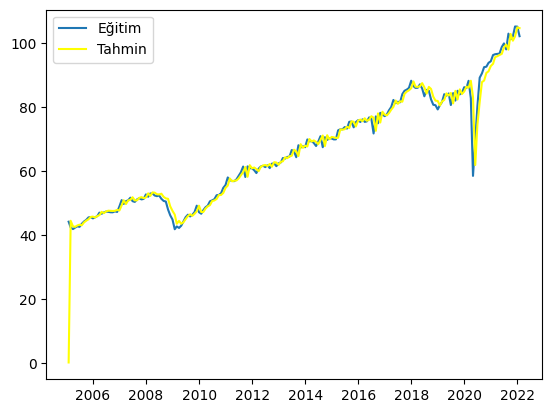

In [27]:
plt.plot(verion,label="Eğitim")
plt.plot(tahming,color="yellow",label="Tahmin")
plt.legend()
plt.show()

In [29]:
def hata(y,tahmin):
  print("MSE: ",mean_squared_error(y,tahmin))
  print("RMSE: ",np.sqrt(mean_squared_error(y,tahmin)))
  print("MAE: ",mean_absolute_error(y,tahmin))
  print("R2:",r2_score(y,tahmin))

hata(verion,tahming)
hata(verison,tahmin)

MSE:  15.667806757239331
RMSE:  3.9582580458124923
MAE:  1.5942176805225146
R2: 0.9453697346603176
MSE:  8.248942818770088
RMSE:  2.8720972857426137
MAE:  2.2607804483079934
R2: -0.25431955583182697


In [30]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index,test_index in tscv.split(veri):
  print("Eğitim: ",train_index)
  print("Test: ",test_index)


Eğitim:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Test:  [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76]
Eğitim:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76]
Test:  [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114]
Eğitim:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  

In [33]:
rmse_puan = []
r2_puan = []
for train_index,test_index in tscv.split(veri):
  X_train,X_test = veri.iloc[train_index],veri.iloc[test_index]
  model = auto_arima(X_train,trace=False,seasonal=True,m=4)
  tahmin = model.predict(len(X_test))
  rmse_puan.append(np.sqrt(mean_squared_error(X_test,tahmin)))
  r2_puan.append(r2_score(X_test,tahmin))
print(rmse_puan)
print(r2_puan)

[8.586794850245141, 6.934241109900787, 2.033816036409045, 9.108226805503683, 9.941880101244637]
[-2.65839958130468, -2.800033648033315, 0.7617328563355306, -1.3322339513253776, -5.102712858904061]


In [34]:
print(np.mean(rmse_puan))

7.320991780660658
